In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import tqdm
from tqdm.auto import tqdm

from LeNet import *     # importe le constructeur du réseau LeNet défini dans le fichier LeNet.py
#from AlexNet import *  # n'a pas été très concluant
from ResNet import *    # importe le constructeur du réseau LeNet défini dans le fichier LeNet.py

In [20]:
torch.cuda.is_available()

True

#### **Initialisation des datasets et entraînement de base**

In [22]:
import pandas as pd
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader, random_split, Subset
from torchvision import transforms, models
import torch.optim as optim

# Pour lire le dataset d'entraînement
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = f"{self.img_dir}/{self.img_labels.iloc[idx, 0]}.jpg"
        image = Image.open(img_path)
        label = self.img_labels.iloc[idx, 1] - 1
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label 

# On lis le fichier csv de train
csv_file = 'train.csv'
labels_df = pd.read_csv(csv_file)

# Ajout de transformations sur les images
data_transforms = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.CenterCrop(256),
    # DATA AUGMENTATION
    transforms.RandomRotation(degrees=90),
    transforms.RandomVerticalFlip(),
    transforms.RandomHorizontalFlip(),
    # FIN DATA AUGMENTATION
    transforms.ToTensor(),
    transforms.Normalize(0.5,0.5)
])

# Charger le dataset complet
dataset = CustomImageDataset(annotations_file='train.csv', img_dir='train/train', transform=data_transforms)

# On sépare le dataset en train et validation
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Autre manière d'implémenter
#train_dataset = Subset(dataset, range(train_size))
#val_dataset = Subset(dataset, range(train_size, train_size+val_size))

# Créer des DataLoader pour les ensembles d'entraînement et de validation
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)

# On choisit le modèle que l'on souhaite utiliser (pour ma part LeNet ou ResNet)
#model = LeNet()
model = ResNet()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# Entraîner le modèle
num_epochs = 20
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0 # AJOUT
    total = 0   # AJOUT
    for inputs, labels in tqdm(train_loader):
        #print(inputs[0])
        #print(inputs[1])
        optimizer.zero_grad()
        outputs = model(inputs)
        # AJOUT : calcul de la train accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        T
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    
    epoch_loss = running_loss / train_size
    epoch_accuracy = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

    print(f'Train Accuracy: {100 * correct / total:.2f}%')

    # Validation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / val_size
    epoch_accuracy = 100 * correct / total
    val_losses.append(epoch_loss)
    val_accuracies.append(epoch_accuracy)

    print(f'Validation Loss: {epoch_loss:.4f}')
    print(f'Validation Accuracy: {epoch_accuracy:.2f}%')

print('Training complete.')

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 1/20, Loss: 2.2576
Train Accuracy: 34.34%
Validation Loss: 9.0303
Validation Accuracy: 32.88%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 2/20, Loss: 1.1986
Train Accuracy: 46.69%
Validation Loss: 4.7945
Validation Accuracy: 27.38%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 3/20, Loss: 1.1167
Train Accuracy: 50.97%
Validation Loss: 4.4667
Validation Accuracy: 42.75%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 4/20, Loss: 1.0921
Train Accuracy: 53.69%
Validation Loss: 4.3685
Validation Accuracy: 44.88%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 5/20, Loss: 1.0433
Train Accuracy: 55.62%
Validation Loss: 4.1732
Validation Accuracy: 38.12%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 6/20, Loss: 1.0002
Train Accuracy: 58.06%
Validation Loss: 4.0008
Validation Accuracy: 52.25%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 7/20, Loss: 0.9542
Train Accuracy: 60.66%
Validation Loss: 3.8168
Validation Accuracy: 52.50%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 8/20, Loss: 0.9421
Train Accuracy: 60.84%
Validation Loss: 3.7686
Validation Accuracy: 45.12%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 9/20, Loss: 0.9270
Train Accuracy: 60.84%
Validation Loss: 3.7080
Validation Accuracy: 57.50%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 10/20, Loss: 0.9083
Train Accuracy: 62.28%
Validation Loss: 3.6331
Validation Accuracy: 58.00%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 11/20, Loss: 0.8750
Train Accuracy: 63.88%
Validation Loss: 3.5002
Validation Accuracy: 61.62%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 12/20, Loss: 0.8684
Train Accuracy: 64.81%
Validation Loss: 3.4737
Validation Accuracy: 63.00%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 13/20, Loss: 0.8420
Train Accuracy: 65.62%
Validation Loss: 3.3679
Validation Accuracy: 66.25%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 14/20, Loss: 0.8134
Train Accuracy: 67.28%
Validation Loss: 3.2538
Validation Accuracy: 61.62%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 15/20, Loss: 0.7902
Train Accuracy: 68.66%
Validation Loss: 3.1607
Validation Accuracy: 62.75%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 16/20, Loss: 0.7508
Train Accuracy: 69.56%
Validation Loss: 3.0030
Validation Accuracy: 48.88%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 17/20, Loss: 0.7530
Train Accuracy: 70.22%
Validation Loss: 3.0120
Validation Accuracy: 68.25%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 18/20, Loss: 0.7374
Train Accuracy: 70.59%
Validation Loss: 2.9496
Validation Accuracy: 69.50%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 19/20, Loss: 0.6729
Train Accuracy: 73.78%
Validation Loss: 2.6915
Validation Accuracy: 55.38%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 20/20, Loss: 0.6951
Train Accuracy: 73.47%
Validation Loss: 2.7804
Validation Accuracy: 62.88%
Training complete.


#### **Surentraînement (pour ResNet, je faisais 20 par 20 epochs)**

In [38]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in tqdm(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        # Calcul de la train accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    
    epoch_loss = running_loss / train_size
    epoch_accuracy = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

    print(f'Train Accuracy: {100 * correct / total:.2f}%')

    # Validation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / val_size
    epoch_accuracy = 100 * correct / total
    val_losses.append(epoch_loss)
    val_accuracies.append(epoch_accuracy)

    print(f'Validation Loss: {epoch_loss:.4f}')
    print(f'Validation Accuracy: {epoch_accuracy:.2f}%')

print('Training complete.')

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 1/20, Loss: 0.2255
Train Accuracy: 91.31%
Validation Loss: 0.9019
Validation Accuracy: 80.75%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 2/20, Loss: 0.2367
Train Accuracy: 91.09%
Validation Loss: 0.9468
Validation Accuracy: 80.75%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 3/20, Loss: 0.2093
Train Accuracy: 92.19%
Validation Loss: 0.8373
Validation Accuracy: 86.12%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 4/20, Loss: 0.1861
Train Accuracy: 93.34%
Validation Loss: 0.7442
Validation Accuracy: 86.62%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 5/20, Loss: 0.1981
Train Accuracy: 93.19%
Validation Loss: 0.7925
Validation Accuracy: 83.88%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 6/20, Loss: 0.1963
Train Accuracy: 92.72%
Validation Loss: 0.7851
Validation Accuracy: 81.88%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 7/20, Loss: 0.2162
Train Accuracy: 92.19%
Validation Loss: 0.8648
Validation Accuracy: 81.62%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 8/20, Loss: 0.2269
Train Accuracy: 91.94%
Validation Loss: 0.9075
Validation Accuracy: 80.38%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 9/20, Loss: 0.1945
Train Accuracy: 93.09%
Validation Loss: 0.7778
Validation Accuracy: 85.38%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 10/20, Loss: 0.2003
Train Accuracy: 92.59%
Validation Loss: 0.8013
Validation Accuracy: 81.75%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 11/20, Loss: 0.2388
Train Accuracy: 90.91%
Validation Loss: 0.9551
Validation Accuracy: 79.25%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 12/20, Loss: 0.1896
Train Accuracy: 93.25%
Validation Loss: 0.7583
Validation Accuracy: 82.88%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 13/20, Loss: 0.2011
Train Accuracy: 92.69%
Validation Loss: 0.8044
Validation Accuracy: 81.62%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 14/20, Loss: 0.1976
Train Accuracy: 93.03%
Validation Loss: 0.7903
Validation Accuracy: 84.25%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 15/20, Loss: 0.1834
Train Accuracy: 93.09%
Validation Loss: 0.7334
Validation Accuracy: 82.25%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 16/20, Loss: 0.1933
Train Accuracy: 92.41%
Validation Loss: 0.7733
Validation Accuracy: 83.75%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 17/20, Loss: 0.2044
Train Accuracy: 92.62%
Validation Loss: 0.8176
Validation Accuracy: 84.00%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 18/20, Loss: 0.1993
Train Accuracy: 92.69%
Validation Loss: 0.7972
Validation Accuracy: 81.38%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 19/20, Loss: 0.1817
Train Accuracy: 92.69%
Validation Loss: 0.7268
Validation Accuracy: 86.50%


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 20/20, Loss: 0.1600
Train Accuracy: 94.19%
Validation Loss: 0.6400
Validation Accuracy: 87.12%
Training complete.


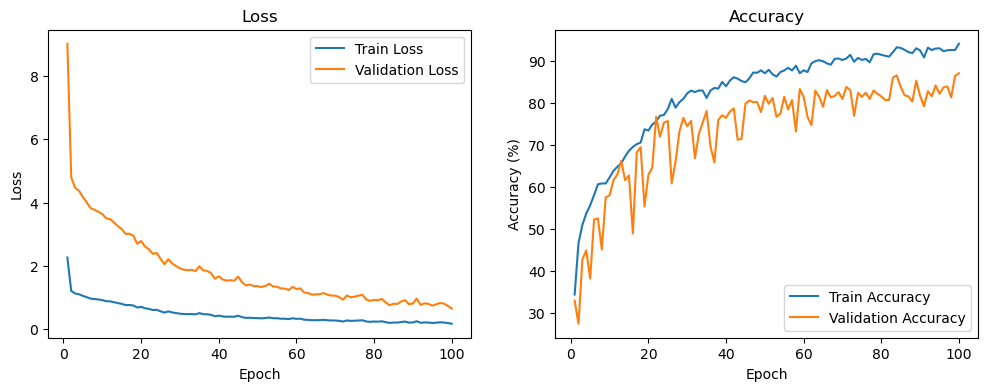

In [39]:
# Traçage des courbes
# Le nombre devant le num_epochs dépend du nombre de sûrentraînement
epochs = range(1, 5*num_epochs + 1)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.savefig('training_results_A_COPIER.png', format='png')

#plt.tight_layout()
plt.show()

### **2. Prédictions**

In [40]:
# Redéfinition de le classe pour ouvrir nos images tests car on n'a pas de csv en entrée
class CustomImageTestDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.img_labels = pd.DataFrame({'filename': os.listdir(img_dir)})
        self.transform = transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = Image.open(img_path)
        if self.transform:
            image = self.transform(image)
        return image, self.img_labels.iloc[idx, 0]


test_images = CustomImageTestDataset(img_dir='test/test', transform=data_transforms)
test_loader = DataLoader(test_images, batch_size=1, shuffle=False, num_workers=4)

# On met le modèle en mode prédiction
model.eval()

predictions = []
file_ids = []

with torch.no_grad():
    for images, filenames in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.cpu().numpy() + 1)
        file_ids.extend([filename.split('.')[0] for filename in filenames])

# Export au format CSV
df = pd.DataFrame({'id': file_ids, 'label': predictions})
df = df.sort_values(by='id')
df.to_csv('predictions.csv', index=False)

#### **Historique d'enregistrement des modèles**

In [41]:
#torch.save(model.state_dict(), 'LeNet_all_dense_dropouts.pth')
#torch.save(model.state_dict(), 'LeNet_dropouts_1_0_0.pth')
#torch.save(model.state_dict(), 'LeNet_dropouts_0_1_0.pth')
#torch.save(model.state_dict(), 'LeNet_dropouts_0_0_1.pth')
#torch.save(model.state_dict(), 'LeNet_dropouts_1_1_0.pth')
#torch.save(model.state_dict(), 'LeNet_dropouts_1_0_1.pth')
#torch.save(model.state_dict(), 'LeNet_dropouts_1_0_1_20_epochs.pth')
#torch.save(model.state_dict(), 'LeNet_dropouts_1_0_1_lr_0.0001.pth')
#torch.save(model.state_dict(), 'LeNet_dropouts_1_0_1_lr_0.01.pth')
#torch.save(model.state_dict(), 'LeNet_dropouts_1_0_1_batch_64.pth')
#torch.save(model.state_dict(), 'LeNet_dropouts_1_0_1_batch_8.pth')
#torch.save(model.state_dict(), 'LeNet_dropouts_1_0_1_batch_6_lr_0.0005.pth')
#torch.save(model.state_dict(), 'LeNet_dropouts_0_1_1.pth')
#torch.save(model.state_dict(), 'LeNet_dropouts_1_0_1_conv_1_10_25.pth')
#torch.save(model.state_dict(), 'LeNet_dropouts_1_0_1_dropout_level_0.5.pth')
#torch.save(model.state_dict(), 'AlexNet_inchannels_1.pth')
#torch.save(model.state_dict(), 'ResNet18_10_epochs.pth')
#torch.save(model.state_dict(), 'ResNet18_20_epochs.pth')
#torch.save(model.state_dict(), 'ResNet18_40_epochs.pth')
#torch.save(model.state_dict(), 'ResNet18_60_epochs.pth')
#torch.save(model.state_dict(), 'ResNet18_80_epochs.pth')
#torch.save(model.state_dict(), 'ResNet18_100_epochs.pth')